# Make FEEM plots

edit the file data.m.  That will include -99 as the top left corner (or any number arbitrary number, it is just there to avoid a "matrix size" error).  The top row are the ex wavelengths. the left row is the em wavelengths.  The "middle" is the fluorescence values.  Change data.m for whatever data you are looking at.  You can save as a different filename.

If you prefer it is also possible to upload data.m or another filename.m from a version created locally on your computer.  Just use the upload button in the folder menu.

**Do not assume that data.m will not be saved permanently.**  This "cloud based application" is a shared resource and many students might use it.  So save your work locally!  Same with the graphs that are generated. you need to collect the graphs you need after generating them.  Also, since this is a shared resource, others will be able to access your data.

You can use a snipping tool to get the graphs.

https://support.microsoft.com/en-us/windows/use-snipping-tool-to-capture-screenshots-00246869-1843-655f-f220-97299b865f6b

Or if you right click on the graphs you can select "copy to clipboard" and paste them into powerpoint or equivalent. These won't be publication ready images but we can make those images when you need them using a local installation of the program.  The idea here is that students can process their data without needing a local installation of Matlab or Octave.

 <span style="color: red;">If the graphs fail to update after changing the data ...</span> **To run this script after updating the data go to the "Run" tab and select the bottom entry "Restart kernel and run all cells".**
 
in the first cell belo load the data. you may have to restart kernel after every data change (probably not, but if things don't update that is a good failsafe I think). Data stored in the folder /data you can run any data file you want (just change the run command in that cell below).  the results will always be saved to data.mat though and you can run fitFEEMtocomponents after to determine PARAFAC-style composition if you choose.


In [271]:
% load the data. you may have to restart kernel after every data change
% data stored in the folder /data
% you can run any data file you want.  the results will always be saved to data.mat
% you can run fitFEEMtocomponents after to determine PARAFAC-style composition if you choose

clear

%datafile=['/home/jovyan/data/Katharina/KDBFB-1.m'];
datafile=['/home/jovyan/data/Katharina/KDBFB-2.m'];
%datafile=['/home/jovyan/data/Danielle/KWD1026ID0.m'];

%run("/home/jovyan/data/data.m")
%run("/home/jovyan/data/data2.m")
%run("/home/jovyan/data/Danielle/KWD1026ID0.m")
run(datafile)

# define functions to manipulate the data 

you can compress these boxes by clicking to the left so they won't "clutter" up the screen

In [272]:
function [F,em,ex]=Fprocess(data,fraction,exmin,exmax,flag)

[N,M]=size(data); c=0; if flag==1; data(data==0)=NaN; end

for i=2:1:M
    c=c+1; MIN=min(data(2:N,i)); F(:,c)=data(2:N,i)-min(data(2:N,i));
end

F=F'; ex=data(1,2:M); em=data(2:N,1); [N,M]=size(F);



for i=1:N
    for j=1:M
        EM=em(j);
        EX=ex(i);
        if EM>=EX*(1-fraction)
            if EM<=EX*(1+fraction)
                F(i,j)=NaN;
            end
        end
    end
end
  
for i=1:N
    for j=1:M
        EM=em(j);
        EX=ex(i);
        if EM>=(2*EX)*(1-fraction)
            if EM<=(2*EX)*(1+fraction)
                F(i,j)=NaN;
            end
        end
    end
end

% now modify for ex max and min

c=0;
for k=1:length(ex);
    extst=ex(k);
    if extst>exmin
        if extst<exmax
        c=c+1;
        EXX(c)=extst;
        FX(c,:)=F(k,:);
        end
    end
end

F=FX; ex=EXX;

end

In [273]:

function [G,H,I]=resample(data,em,ex,samplefreq)

% try to resample so things look better

[N,M]=size(data); % M is em points N is ex points

for i=1:N
    Fem=data(i,:); c=0;
    for j=1:round(M/samplefreq):M
       c=c+1; Femred(c)=Fem(j); emred(c)=em(j);
    end
    datare(i,:)=Femred;
end

[N,M]=size(datare); % M is em points N is ex points.  sample into 10 steps.

for i=1:M
    Fex=datare(:,i); c=0;
    for j=1:round(N/samplefreq):N
       c=c+1;
       Fexred(c)=Fex(j); exred(c)=ex(j);
    end
    datarere(:,i)=Fexred;
end

G=datarere;
H=emred;
I=exred;

end

In [274]:
function makesurfaceplot(F,em,ex)
 colormap('jet'); shading interp
 h=surf(em,ex,F);
 set(gca,'linewidth',2)
 view([-26 48])
 axis([min(em) max(em) min(ex) max(ex) 0 max(max(F))*1.1])
 h=xlabel('Emission (nm)'); set(h,'fontsize',12)
 h=ylabel('Excitation (nm)');  set(h,'fontsize',12)
 h=zlabel('Intensity (arb.)'); set(h,'fontsize',12)
end

In [275]:
function makemeshplot(F,em,ex)
 colormap('jet'); 
 h=mesh(em,ex,F);
 set(gca,'linewidth',2)
 view([-26 48])
 shading flat
 axis([min(em) max(em) min(ex) max(ex) 0 max(max(F))*1.1])
 h=xlabel('Emission (nm)'); set(h,'fontsize',12)
 h=ylabel('Excitation (nm)');  set(h,'fontsize',12)
 h=zlabel('Intensity (arb.)'); set(h,'fontsize',12)
end

In [276]:
function makecontourplot(F,em,ex)
 colormap('jet')
 h=surf(em,ex,F);
 shading interp
 hold on; [C,h]=contour3(em,ex,F,3,'k'); set(h,'linewidth',2); 
 set(gca,'linewidth',2,'fontsize',12)
 axis([min(em) max(em) min(ex) max(ex) 0 max(max(F))])
 view([0 90])
 %hold on; plot3([250 600],[450 450],[0 0],'k','linewidth',2)
 %hold on; plot3([600 600],[220 450],[0 0],'k','linewidth',2)
 h=xlabel('Emission (nm)'); set(h,'fontsize',12)
 h=ylabel('Excitation (nm)');  set(h,'fontsize',12)
 %add scale bar
 colorbar 
end

In [277]:
function makesimplecontourplot(F,em,ex,num)
 [C,h]=contour(em,ex,F,num,'k'); set(h,'linewidth',2); 
 set(gca,'linewidth',2,'fontsize',12)
 axis([min(em) max(em) min(ex) max(ex)])
 h=xlabel('Emission (nm)'); set(h,'fontsize',12)
 h=ylabel('Excitation (nm)');  set(h,'fontsize',12)
end

# Now make the plots

you need to decide the width of the scatter line.  default is 0.02 but sometimes a larger value is necessary to remove all the scatter (scatter depends on molecular size and is not the same for all samples (or spectrometers for that matter).  You also need to set the minimum excitation wavelengths.  Some instruments give a lot of data at excitation wavelengths with no fluorescence (Aqualog for example) and often low excitation wavelengths are just noise that make the rest of the scan hard to read (most instruments operate in ratio mode where the fluorescence is divided by the incident light intensity, low intensity excitation light at low wavelengths results in very large, but noisy signals).

You can change the settings and rerun the plots without restarting the kernel (select "Run" tab and then "Run all cells" or for a specific graph just click the "play" button on the top ribbon bar when that cell is selected).

There is an optional flag.  If it is set to 1 then all zero values in the original data will be replaced by NaN (not a number).  the reason for this is that sometimes an instrument will automatically set values where emission is less than excitation to zero (you can't  have more energy out than you put in).  With the way I do background subtraction this can lead to strange looking data, so replacing it with NaN potentially takes care of that.

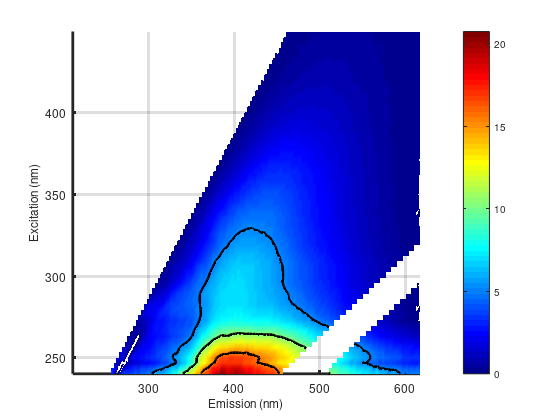

In [290]:
%contour plot over colourmap.
scatterfactor=0.01; exmin=240; exmax=450; flag=1;
[F,em,ex]=Fprocess(data,scatterfactor,exmin,exmax,flag);
graphics_toolkit ("notebook"); 
makecontourplot(F,em,ex)

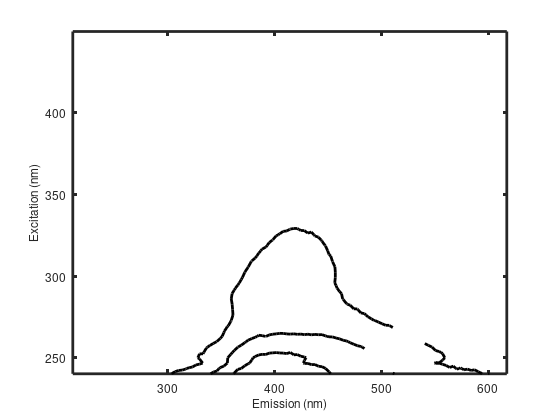

In [279]:
%black and white contour plot
% need to define the number of contour lines

num=3;

graphics_toolkit ("notebook"); 
makesimplecontourplot(F,em,ex,num)

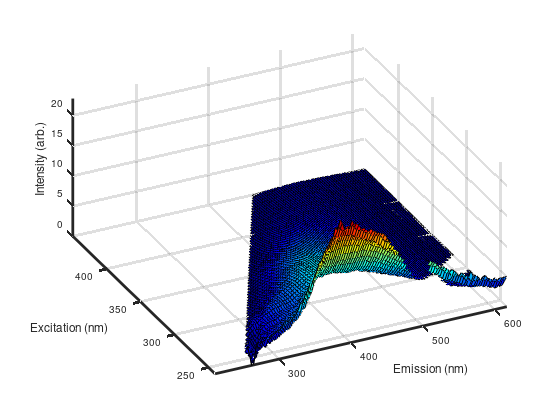

In [280]:
%plot of all the data in 3D
graphics_toolkit ("notebook"); 
makesurfaceplot(F,em,ex)

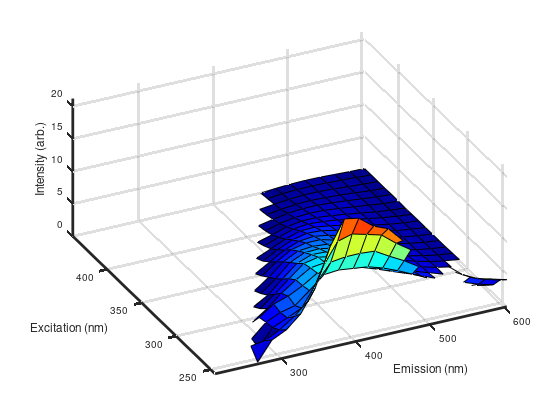

In [281]:
% resample the data to improve the appearance of the plot.  looks better if ex and
% em are sampled at similar resolution
% you need to set the samplefreq parameter
graphics_toolkit ("notebook"); 
samplefreq=20; %divide ex and em into samplereq equal steps.  so bigger number closer.
[Fr,emr,exr]=resample(F,em,ex,samplefreq); %
makesurfaceplot(Fr,emr,exr)

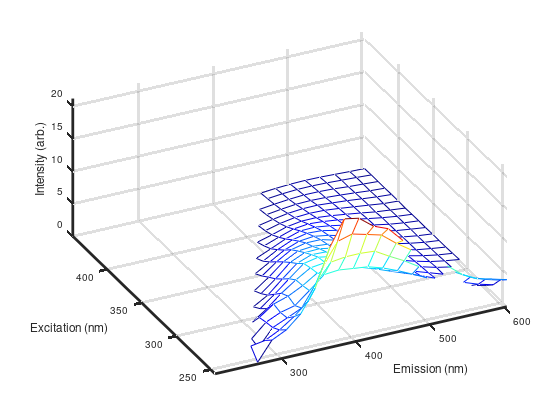

In [282]:
% resampled plot but with a wire mesh look
graphics_toolkit ("notebook"); 
makemeshplot(Fr,emr,exr)

# Picking specific values

Using the graph below you can find fluorescence values at any ex/em pairs that you wish to use for fluorescnece indices such as humification index or fluorescence index.

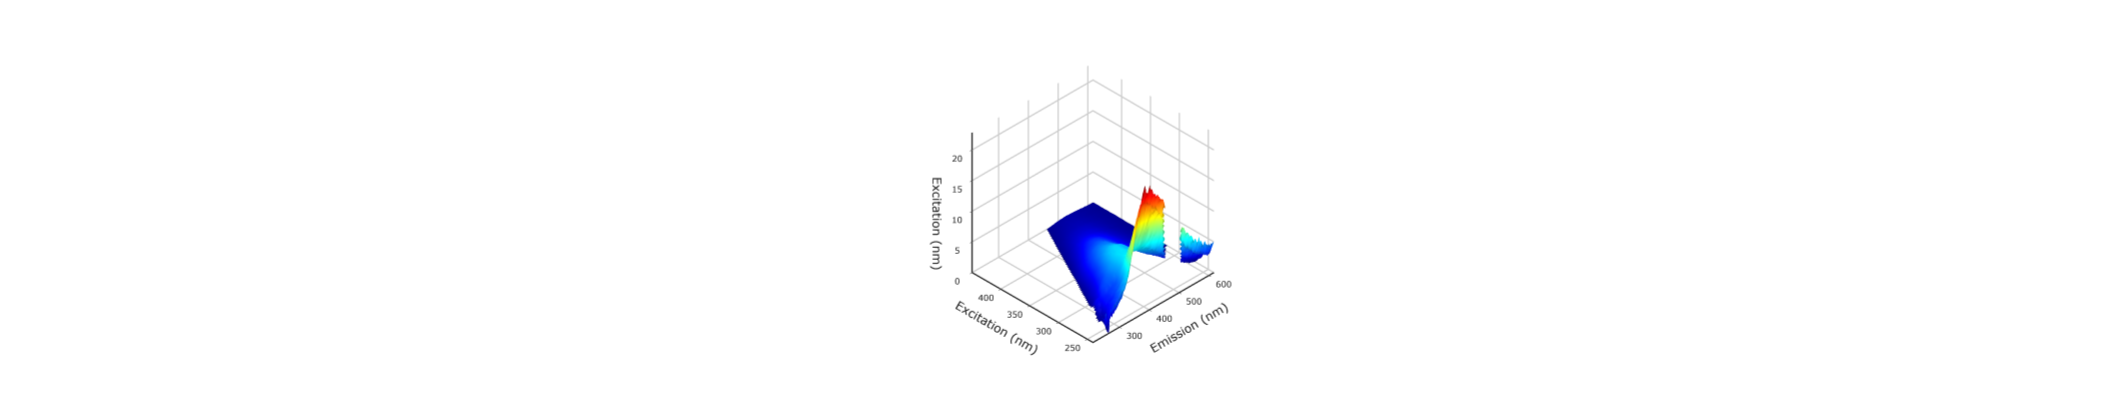

In [283]:
% use the plotly plotting command to make the surface rotatable
graphics_toolkit ("plotly"); 
makesurfaceplot(F,em,ex)

# Printing

If you want to print replace the graphing command below with whatever one you want to use (from the examples above).  Make sure you save the fig.png file (it will dissapear when the machine is restarted).  If you need higher resolution image the svg command might be better.

In [284]:
% print the plots as files for download.  also download data as a mat file
% remove the comment below to generate the file for download

%save data.mat F em ex

%available_graphics_toolkits ()
%graphics_toolkit ("fltk"); 

%%% remove the comment (%) from the two commands below
%makemeshplot(Fr,emr,exr)
%print fig.png -dpng
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%55



# SAVE

save the data using the same name as the original file but with .mat instead of .m.. also to the same path.

save data.mat F em ex Fr emr exr

In [285]:
forsave=datafile(1:end-1);
forsave=[forsave,'mat'];
txt=['save ',forsave,' F em ex Fr emr exr']; eval(txt)

# To add

1. linear regression and OpenFlour database components  (see fitFEEMtocomponents.ipynb)
2. absorbance correction (although Aqualog should do this automatically)
3. SIMPLISMA self modelling mixture analysis
4. Automate fluorescence index calculations